# Q1 - Data Exploration

## Intoduction

we decided to use 'Individual household electric power consumption Data Set' , the data describe 2,075,259 measurements of electric power consumption in one household with a one minute sampling rate over a period of almost 4 years. there are 9 attributes that describe electrical quantities and some sub-metering values.

first let's take a look on the data:

In [115]:
import pandas as pd
data = pd.read_csv('household_power_consumption.txt',delimiter=';')
display(data.tail())
print('data shape: {}'.format(data.shape))

C:\Users\shavit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


data shape: (2075259, 9)


as we can see our data has 9 columns and 2,075,259 rows.  
**attribute information:**
* global_active_power: The global minute-averaged active power consumed by the household (kilowatts).  
* global_reactive_power: The global minute-averaged reactive power consumed by the household (kilowatts).  
* voltage: minute-averaged voltage (in volt)  
* global_intensity: household global minute-averaged current intensity (in ampere)  
* sub_metering_1: Active energy for kitchen (watt-hours of active energy).
* sub_metering_2: Active energy for laundry (watt-hours of active energy).
* sub_metering_3: Active energy for climate control systems (watt-hours of active energy).  
* one more feature we can extract is 'sub_metering_4' that represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. and is calculated by the following formula:  
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)  
  
  
**remarks:**
* the data contain missing values. (For instance, the dataset shows missing values on April 28, 2007)
  
(all the information above was taken from https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

## missing values?

let's take a look of april 28, 2007 row, to see how missing values are indicate in this data set:

In [116]:
import numpy as np
ex = np.where(data['Date'] == '28/4/2007')[0].tolist()

In [117]:
data.iloc[ex,:].tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
191911,28/4/2007,23:55:00,?,?,?,?,?,?,NaN
191912,28/4/2007,23:56:00,?,?,?,?,?,?,NaN
191913,28/4/2007,23:57:00,?,?,?,?,?,?,NaN
191914,28/4/2007,23:58:00,?,?,?,?,?,?,NaN
191915,28/4/2007,23:59:00,?,?,?,?,?,?,NaN


as we can see null values indicate as '?' and NaN.  
we can also see that even if we dont have any measurments all the time stemps exists.

In [118]:
data.iloc[:,3:].dtypes

Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

the reason that sub_metering_3 is float and all the others are object is the fact that in this column missing value indicate a NaN, while in the others it is indicate as '?', these columns consist str and numeric values and hence the type is object.  
in order to be consistents we will indicate all the missing values in all the data set with NaN.  
let's do that:

In [119]:
data = data.replace('?',float('NaN'))

we will use Date + time as index:

In [120]:
data['Date'] = data['Date'] + ' ' + data['Time'] 
data = data.drop(['Time'],axis=1).set_index('Date')

In [121]:
data = data.astype(float)
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

as we can see now all the features are float64. and we combined the index to be one column that consist date+time.

In [122]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


calculate number of missing values in the data:

In [123]:
print('{} %'.format(((data.shape[0] - data.dropna().shape[0])/data.shape[0])*100))

1.2518437457686005 %


** as we saw there are 1.25% rows with missing values, we will handle them later when we prepare data before train **

let's look at some statistics about the features:

In [124]:
data.describe().transpose()[['count','min','max','mean','std']]

,count,min,max,mean,std
Global_active_power,2049280.0,0.076,11.122,1.091615,1.057294
Global_reactive_power,2049280.0,0.000,1.390,0.123714,0.112722
Voltage,2049280.0,223.200,254.150,240.839858,3.239987
Global_intensity,2049280.0,0.200,48.400,4.627759,4.444396
Sub_metering_1,2049280.0,0.000,88.000,1.121923,6.153031
Sub_metering_2,2049280.0,0.000,80.000,1.298520,5.822026
Sub_metering_3,2049280.0,0.000,31.000,6.458447,8.437154


we can notice that the ranges are varies for example 'global reactive' is in range of [0,1.39], and voltage is in range of [223,254].

## visualize

let's look at the distribution of values for each feature:

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'value for sample')

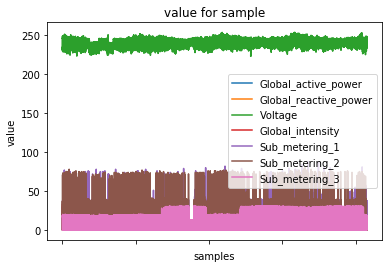

In [125]:
import matplotlib.pyplot as plt
%pylab inline 

for i in data.iloc[:,:]:
    data[i].plot()
legend()
plt.xlabel('samples')
plt.ylabel('value')
plt.title('value for sample')

we can see that the features with high std are more dominant in the plot , and it is easy to recognize them, the goal of this plot is to visualize the distribution of values for each feature, and to see more easily that some features have high values and other low. this is reasonable because each feature measure different thing.  
in this plot it is difficult to trace each feature so we will plot for each feature, to see if there are any anomaly with the values:

In [126]:
def plot_multiple(data,nrows=4,ncols=4,new=True,fig=None,ax=None,figsize=(20,20)):
    if new==True:
        fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)
    for i in range(0,len(data.columns)):
        if nrows>1:
            plot_ax = ax[i//ncols,i%ncols]
        else:
            plot_ax = ax[i]
        plot_ax.plot(list(data.iloc[:,i:i+1].values))
        plot_ax.set_title(data.columns[i], fontsize=20)
    fig.tight_layout()
    return fig,ax

all the smaples:

(<matplotlib.figure.Figure at 0x281684b6588>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028170B81908>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x00000281715C7B38>]], dtype=object))

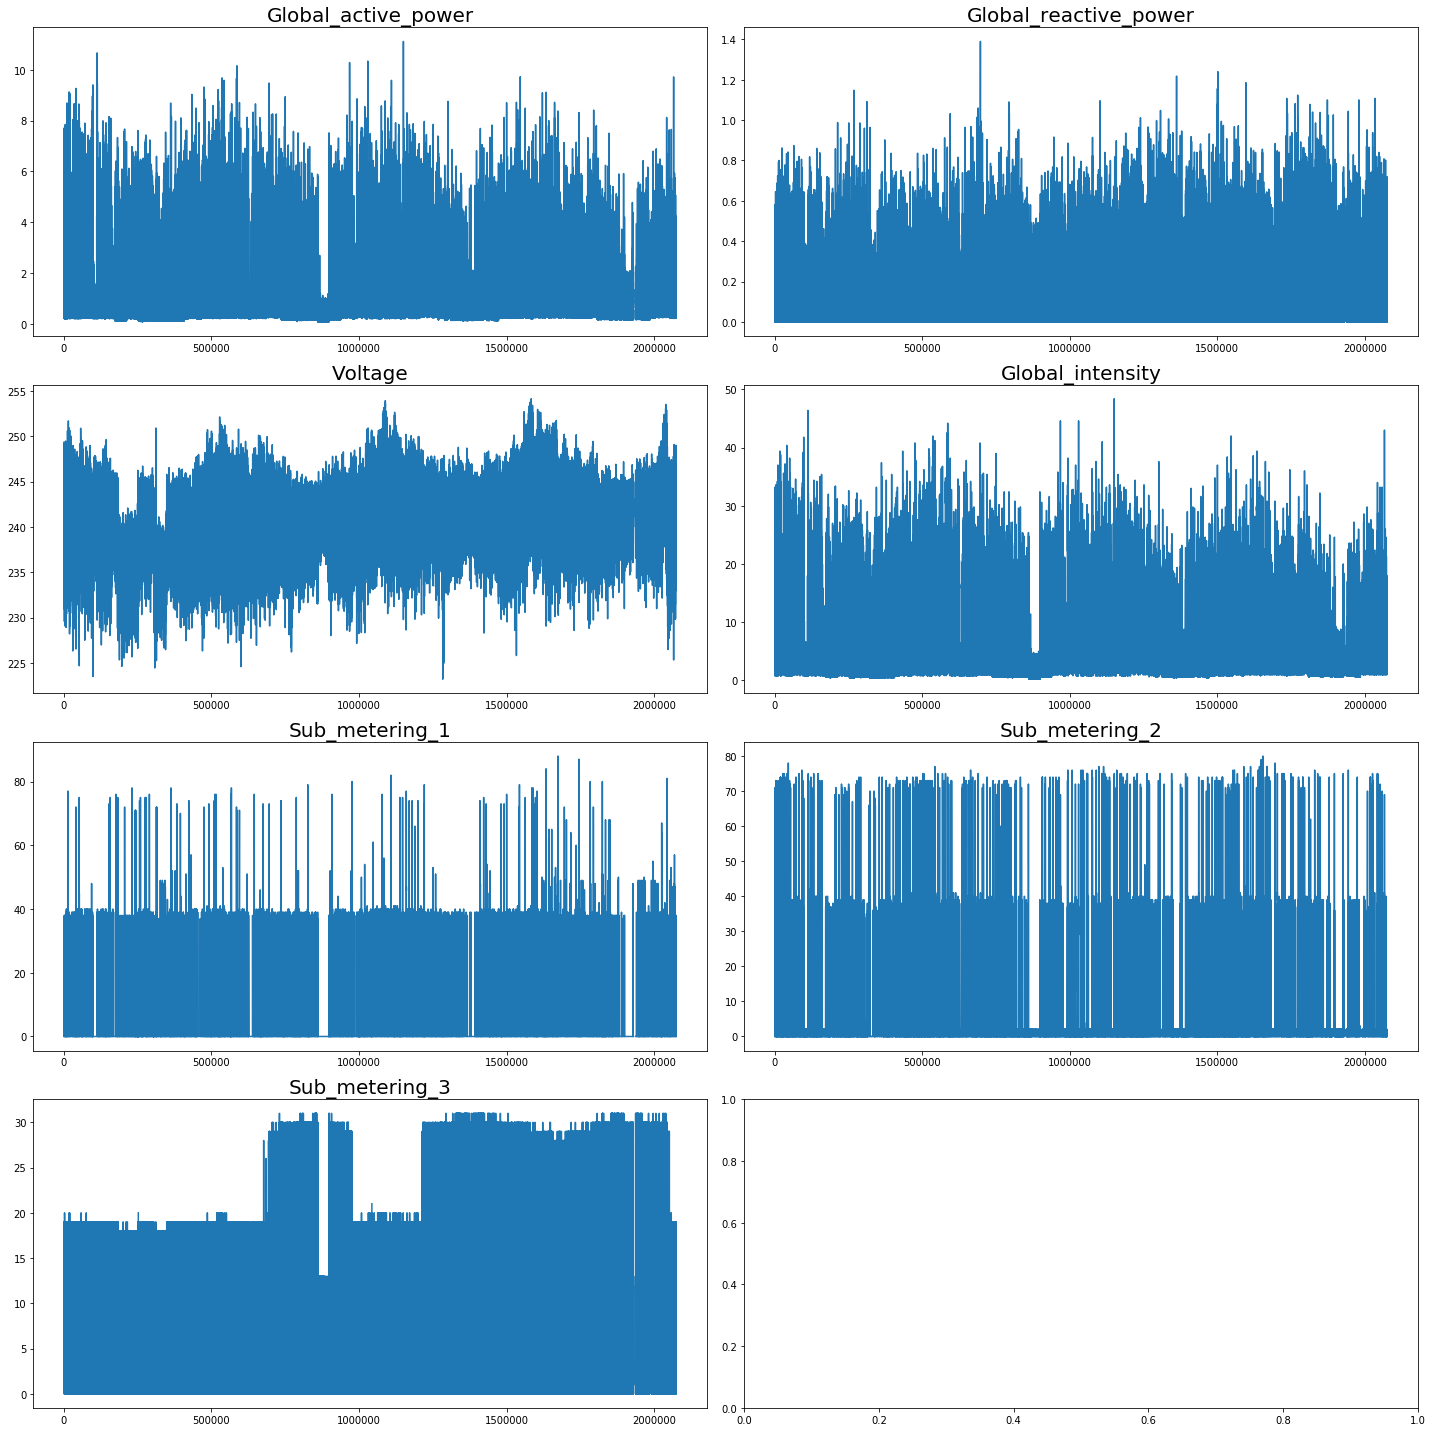

In [127]:
plot_multiple(data.iloc[:,:],4,2)

plot the first 2 weeks, first week is with blue color, second week is with orange, we can notice that there are similar patterns.

(<matplotlib.figure.Figure at 0x2817095a390>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002817099FC50>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x00000281C3388CC0>]], dtype=object))

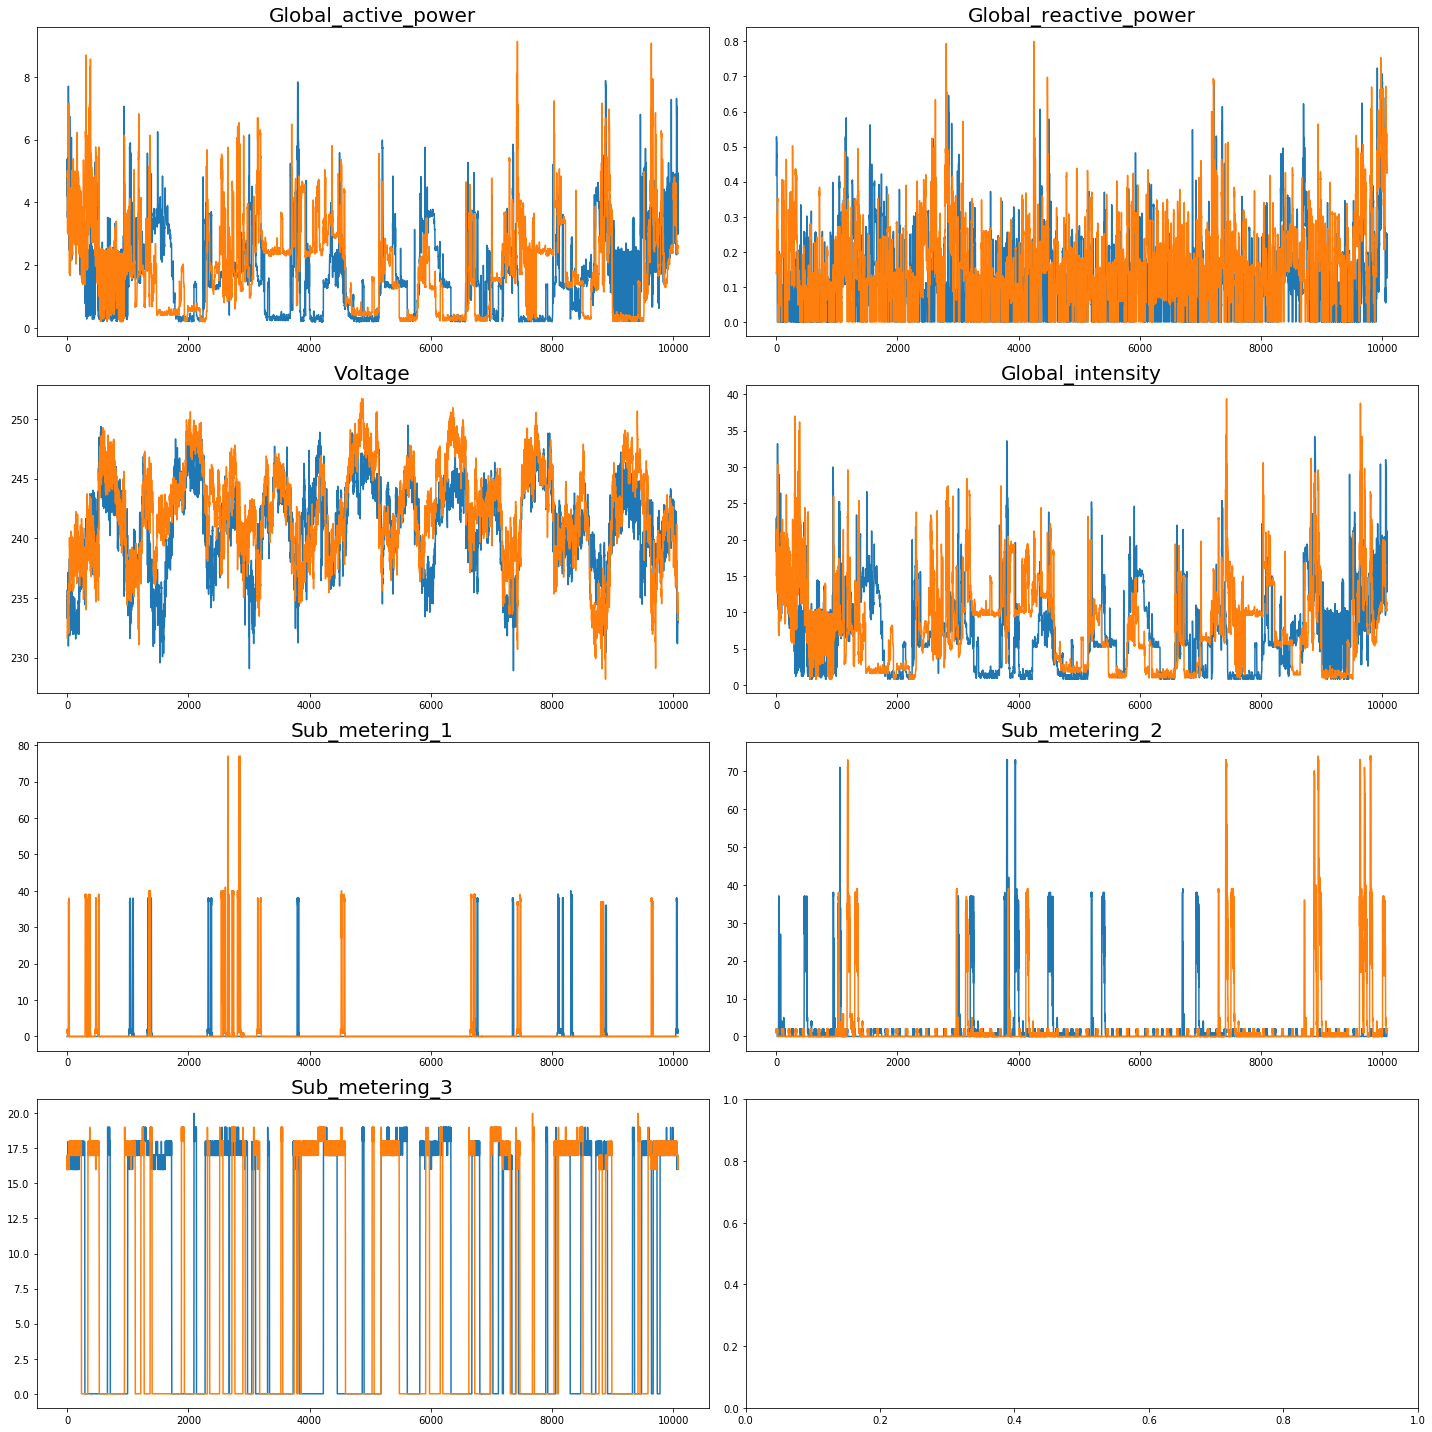

In [128]:
fig,ax = plot_multiple(data.iloc[:24*7*60,:],4,2)
plot_multiple(data.iloc[24*7*60:2*24*7*60,:],4,2,False,fig,ax)

from the plot above we can also notice that sub_metering_2 that describe the laudry has different patterns in the first week in compare to the second week, probably not at the same day every week the washing machine is working. in the first week (blue) it most worked in the middle of the week while in the second the machine worked mainly during the weekend. 

here we plot the active energy for kitchen in 2 different weeks, the blue plot describe christmas week, the holiday is in the second day, as we can see in this day the kitchen energy is very high in compare to the same day in a regular week (orange). 

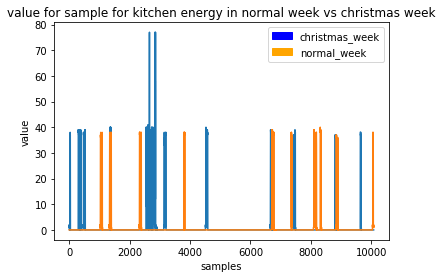

In [129]:
import matplotlib.patches as mpatches

plot(data.iloc[60*24*7:60*24*14,4:5].values)
plot(data.iloc[:60*24*7,4:5].values)
plt.xlabel('samples')
plt.ylabel('value')
plt.title('value for sample for kitchen energy in normal week vs christmas week')

christmas_week = mpatches.Patch(color='orange', label='normal_week')
normal_week = mpatches.Patch(color='blue', label='christmas_week')
plt.legend(handles=[normal_week,christmas_week])

#### here we plot the 'Global_active_power' in a random weekend time (saturday,sunday) and 2 days in the middle of the week(Wednesday, Thursday). 

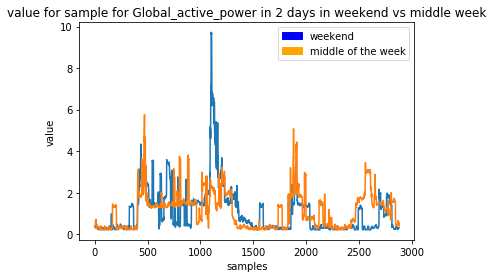

In [134]:
import matplotlib.patches as mpatches

plot(data.iloc[-9903:-7023,0:1].values)
plot(data.iloc[-4143:-1263,0:1].values)
plt.xlabel('samples')
plt.ylabel('value')
plt.title('value for sample for Global_active_power in 2 days in weekend vs middle week')

christmas_week = mpatches.Patch(color='orange', label='middle of the week')
normal_week = mpatches.Patch(color='blue', label='weekend')
plt.legend(handles=[normal_week,christmas_week])

this plot describe 2 days, so the middle is the end of he first day, we can infer that the global consumption at saturday pm is higher durnig the weekend. this is probably all the family members stay at home together and maybe they share dinner of any other activity that involve higher electricity than normal or maybe they just all in home, while in the middle of the week they stay a job, school and etc until late.

to conclude:
* we can see that there are some anomalous but most of them probably because of the Nan values, because we see that the value in these anomalies decrese to 0. it will be more clever to keep it in mind and check again after we handle Nan values.  
* we also have to remember that this data set measure one household so if the family is in holiday for day or more probably high decrese is reasonable.
* we can also recognize patterns that repeat themselves, this is because probably the family use the same amount of electricity in everyday life (for the same season).
* voltage feature has different value range. the rest are almost the same range (scale by watt).  
* there is a difference in the electricity consumption during weekend and middle of the week.

# The Goal:

we will rearrange the data into hours and our goal will be to predict the next hour consumption, given X hours before.

# Part 2  

### spliting the data

because we chose to resample the data by hours we will have enough data for training, so we decided to use split of ~80% to train and ~20% to test. we decided to split from 18/1/2010 because it's a new week (from monday) and found it better to start from new week because it may help us later. (because it's time series we didnt use any shuffle method.)

In [135]:
test_start_index = np.where(pd.DataFrame(data.index)['Date'] == '18/1/2010 00:00:00')[0][0]
test_d = data.iloc[test_start_index:]
train_d = data.iloc[:test_start_index]
train_d.to_csv('train_data.csv')
test_d.to_csv('test_data.csv')

In [137]:
test_d.shape

(450543, 7)

In [139]:
train_d.shape

(1624716, 7)

                             =>  =>  => continue on the next notebook =>  =>  =>